<a href="https://www.kaggle.com/code/islamic/market-campaign-analysis?scriptVersionId=167439786" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

In [2]:
#load the dataset
marketing_data = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv",header =0,sep='\t')
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
#dimension
marketing_data.shape

(2240, 29)

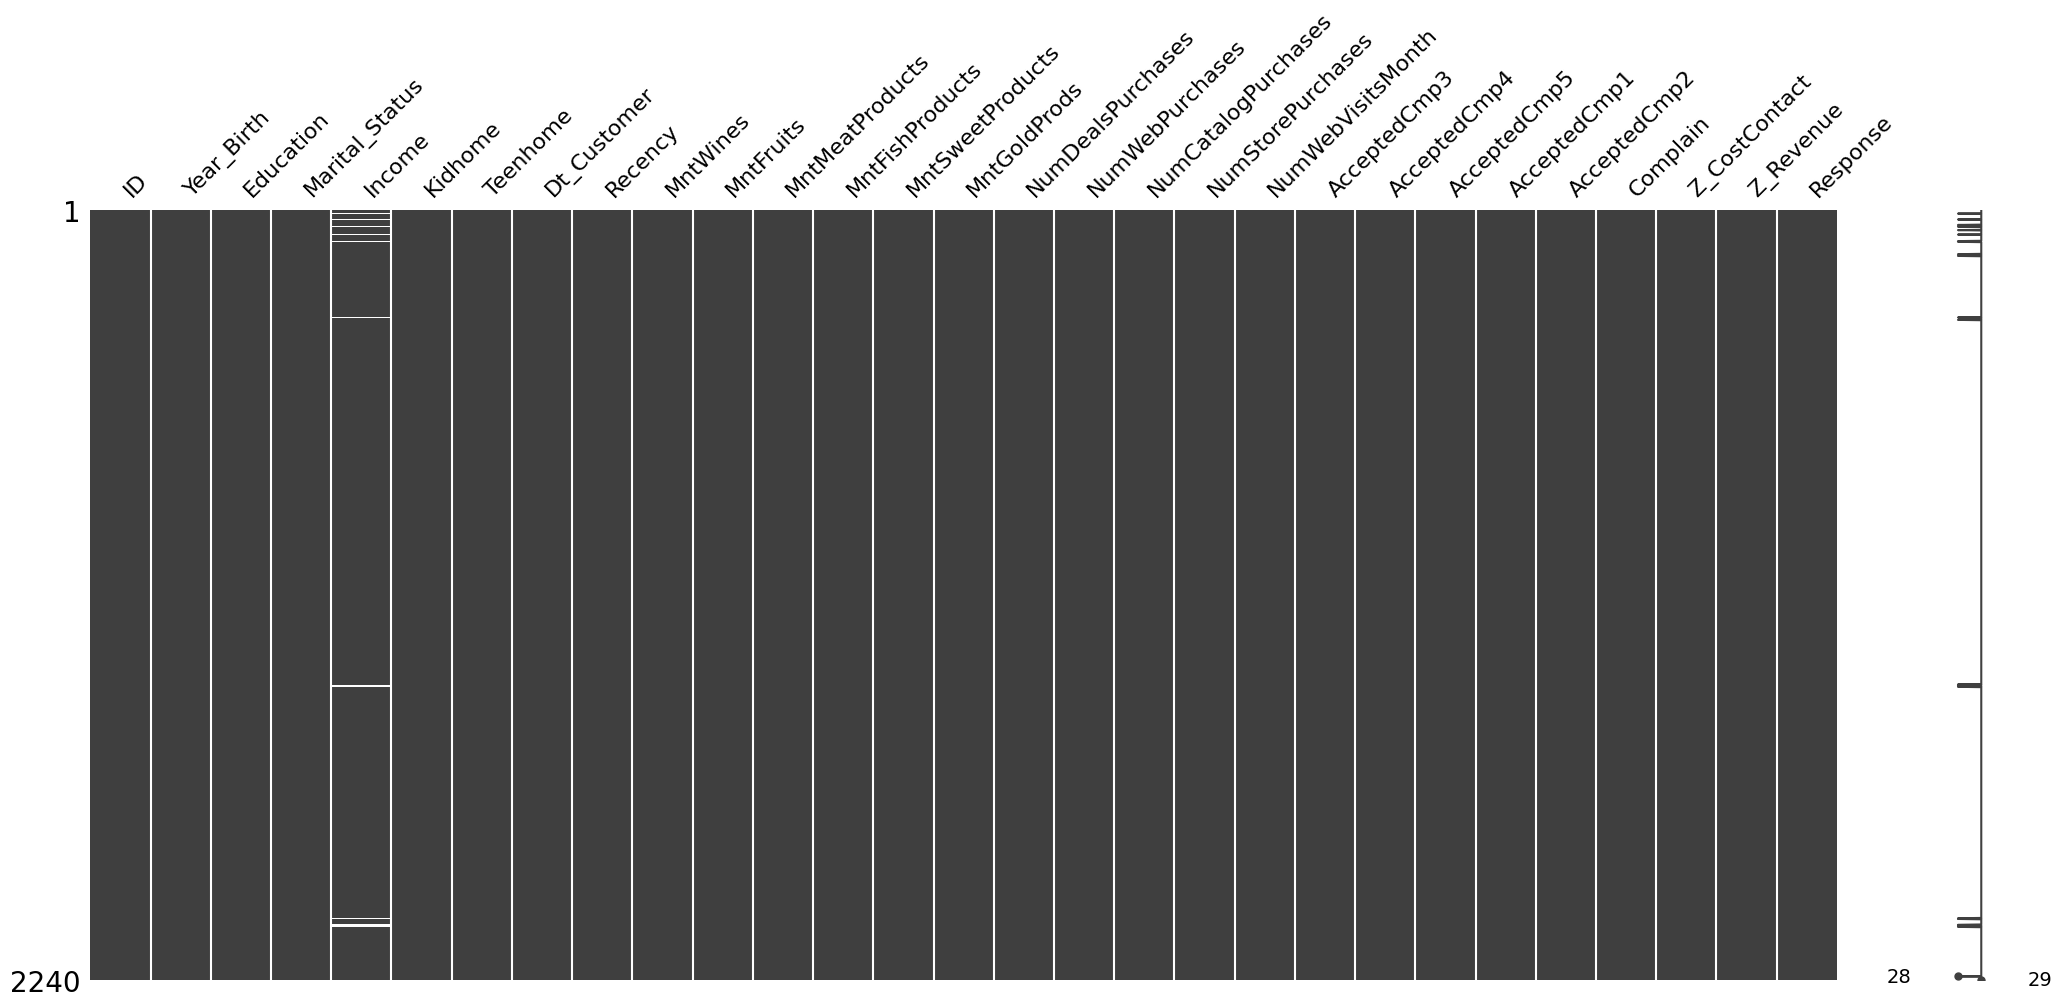

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
#checking null values

msno.matrix(marketing_data)
plt.show()

marketing_data.isna().sum()

In [5]:
#fill up the null value in income column
print(marketing_data['Income'].dtypes)
marketing_data['Income'] = marketing_data['Income'].fillna(marketing_data['Income'].median())
marketing_data.isna().sum()

float64


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [6]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **EDA**

In [7]:
marketing_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

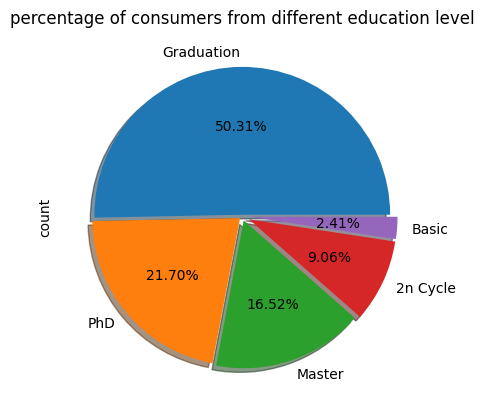

In [8]:
#categorical Distribution
#sns.countplot(data=marketing_data,x='Education')
Number_of_diff_eductaionbackground_consumers = marketing_data['Education'].value_counts()
Number_of_diff_eductaionbackground_consumers.plot(kind='pie',autopct="%.2f%%",explode=[0.01,0.02,0.03,0.05,0.05],shadow=True)
plt.title("percentage of consumers from different education level")
plt.show()

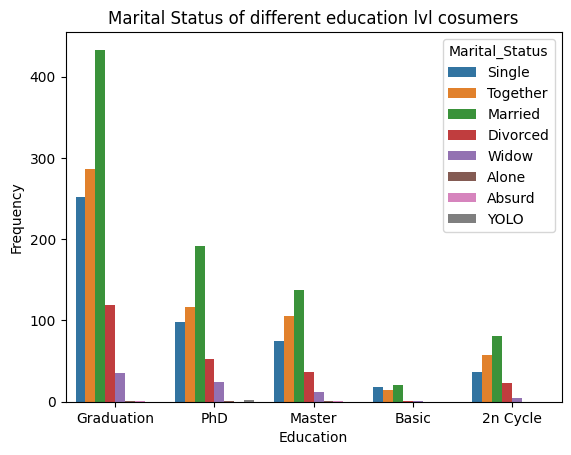

In [9]:
#bar chart
sns.countplot(data=marketing_data,x='Education',hue="Marital_Status")
plt.title("Marital Status of different education lvl cosumers")
plt.ylabel("Frequency")
plt.show()

**Maximum consumers are married here. than live together**.  

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64


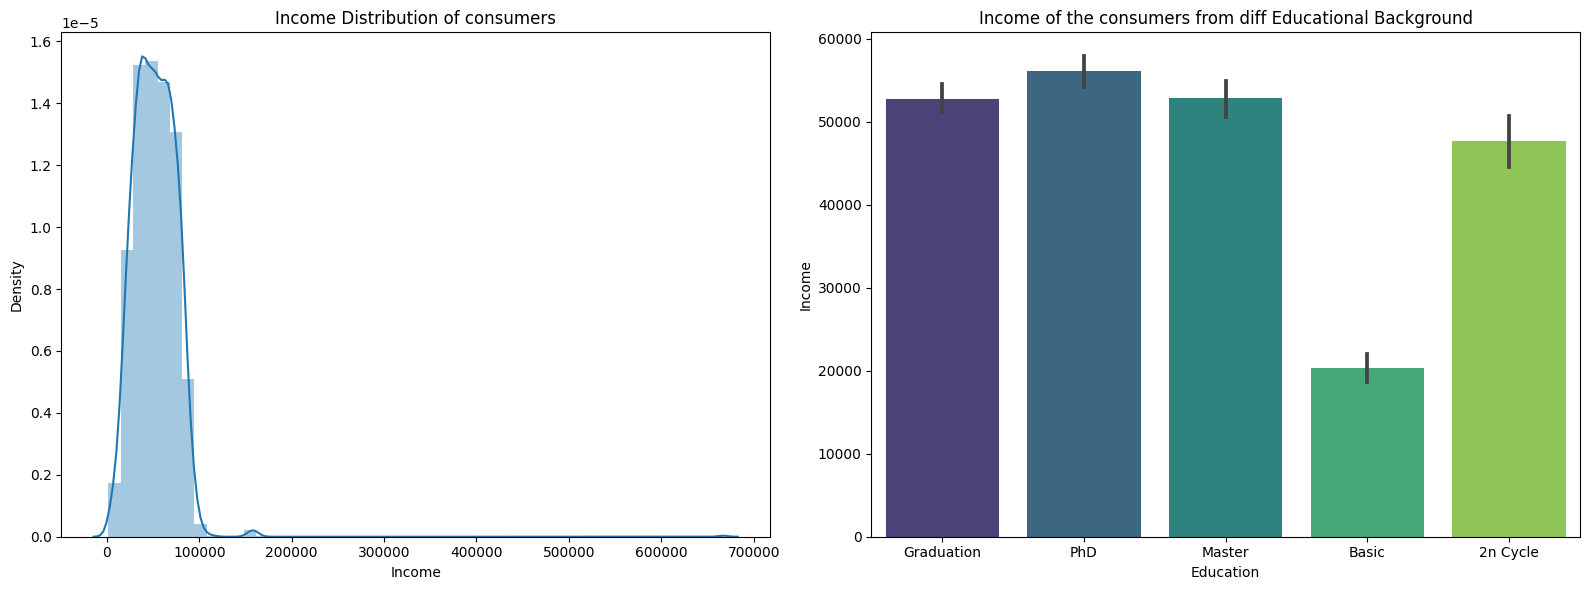

In [10]:
#income statistics
print(marketing_data['Income'].describe())

#income Distribution
plt.figure(figsize=(16, 6)) 
plt.subplot(1,2,1)
sns.distplot(a=marketing_data['Income'],bins=50)
plt.title("Income Distribution of consumers")

plt.subplot(1,2,2)
sns.barplot(data=marketing_data,x="Education",y="Income",palette="viridis")
plt.title("Income of the consumers from diff Educational Background")
plt.tight_layout()
plt.show()

**PhD holders have high rank of Income**

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64


(0.0, 120000.0)

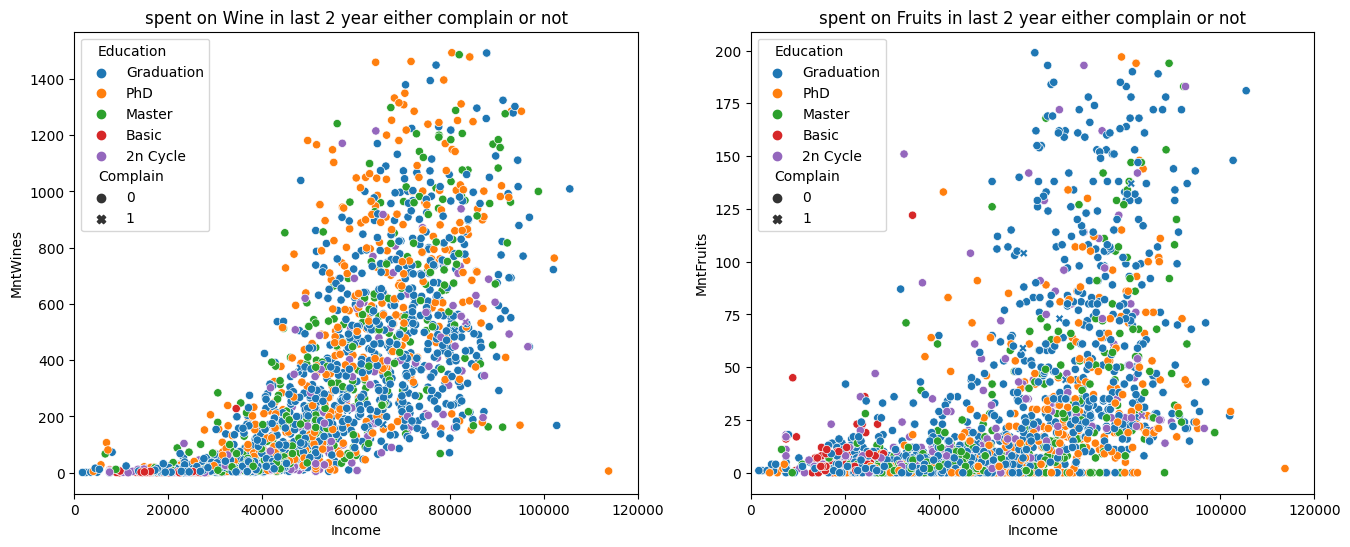

In [11]:
#income statistics
print(marketing_data['Income'].describe())

plt.figure(figsize=(16,6))

#spent on wine in last 2 years
plt.subplot(1,2,1)
sns.scatterplot(data=marketing_data,x="Income",y="MntWines",hue="Education",style="Complain")
plt.title("spent on Wine in last 2 year either complain or not")
plt.xlim(0,120000)

#spent on fruits in last 2 years
plt.subplot(1,2,2)
sns.scatterplot(data=marketing_data,x="Income",y="MntFruits",hue="Education",style="Complain")
plt.title("spent on Fruits in last 2 year either complain or not")
plt.xlim(0,120000)

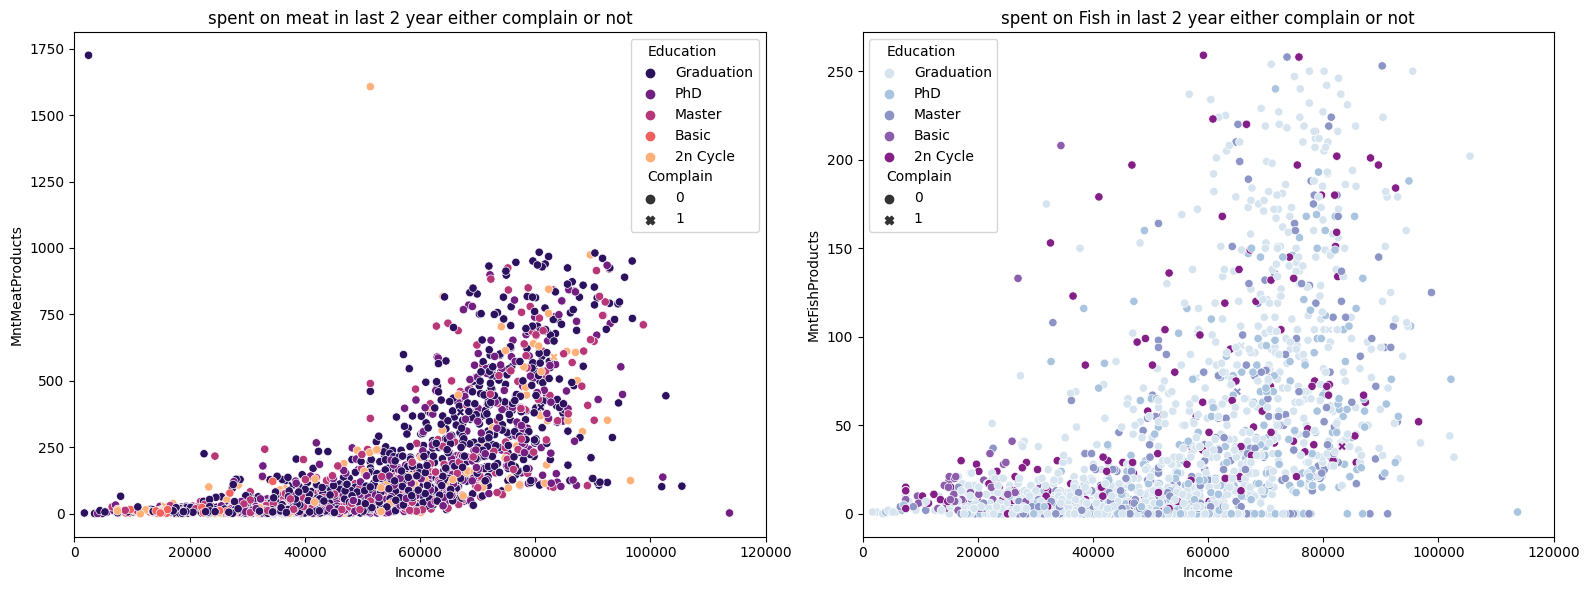

In [12]:
plt.figure(figsize=(16,6))
#spent on meat in last 2 years
plt.subplot(1,2,1)
sns.scatterplot(data=marketing_data,x="Income",y="MntMeatProducts",hue="Education",style="Complain",palette="magma")
plt.title("spent on meat in last 2 year either complain or not")
plt.xlim(0,120000)

#spent on fish products 
plt.subplot(1,2,2)
sns.scatterplot(data=marketing_data,x="Income",y="MntFishProducts",hue="Education",style="Complain",palette="BuPu")
plt.title("spent on Fish in last 2 year either complain or not")
plt.xlim(0,120000)

plt.tight_layout()
plt.show()

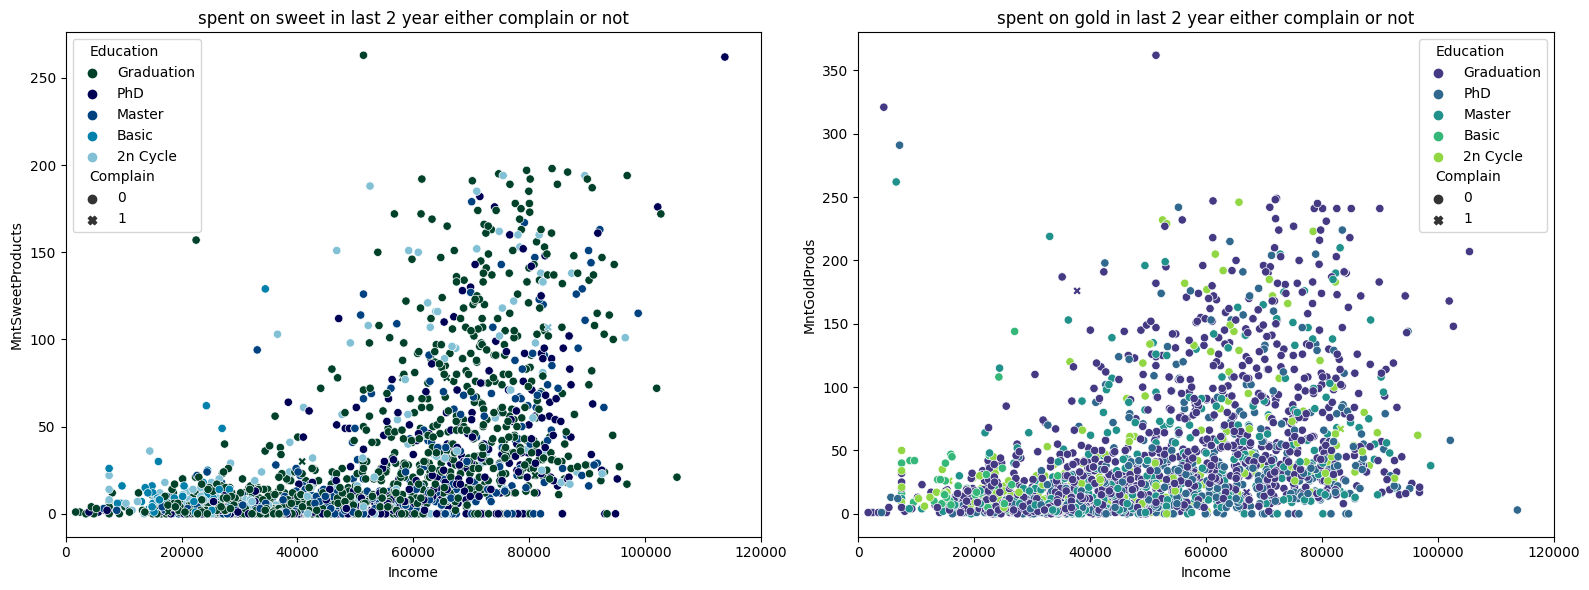

In [13]:
plt.figure(figsize=(16,6))
#spent on meat in last 2 years
plt.subplot(1,2,1)
sns.scatterplot(data=marketing_data,x="Income",y="MntSweetProducts",hue="Education",style="Complain",palette="ocean")
plt.title("spent on sweet in last 2 year either complain or not")
plt.xlim(0,120000)

#spent on fish products 
plt.subplot(1,2,2)
sns.scatterplot(data=marketing_data,x="Income",y="MntGoldProds",hue="Education",style="Complain",palette="viridis")
plt.title("spent on gold in last 2 year either complain or not")
plt.xlim(0,120000)

plt.tight_layout()
plt.show()

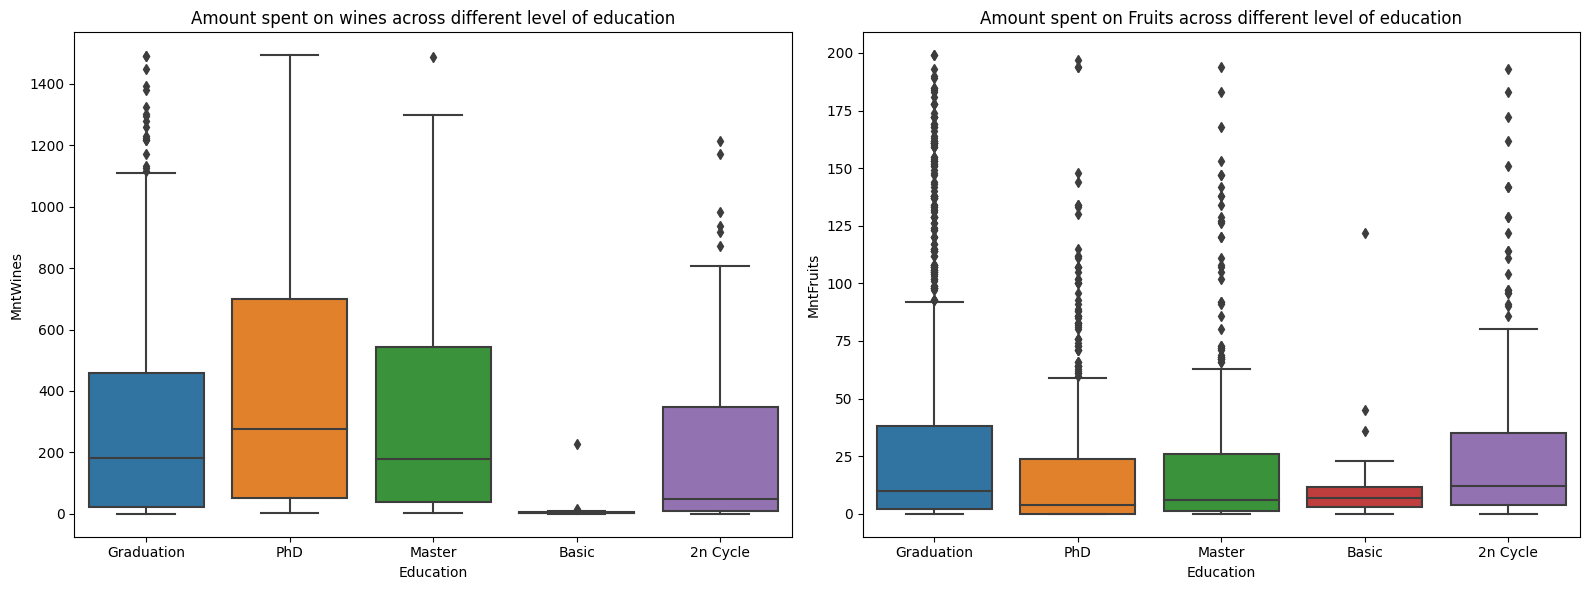

In [14]:
#. Each box in the plot represents the interquartile range (IQR) of the wine and fruits spending for a specific education level,
#with the median indicated by the horizontal line inside the box.

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(data=marketing_data,x="Education",y="MntWines")
plt.title("Amount spent on wines across different level of education")

#Fruits
plt.subplot(1,2,2)
sns.boxplot(data=marketing_data,x="Education",y="MntFruits")
plt.title("Amount spent on Fruits across different level of education")
plt.tight_layout()
plt.show()

# # **Each box in the plot represents the interquartile range (IQR) of the wine and fruits spending for a specific education level,with the median indicated by the horizontal line inside the box. Outliers are also detected.**

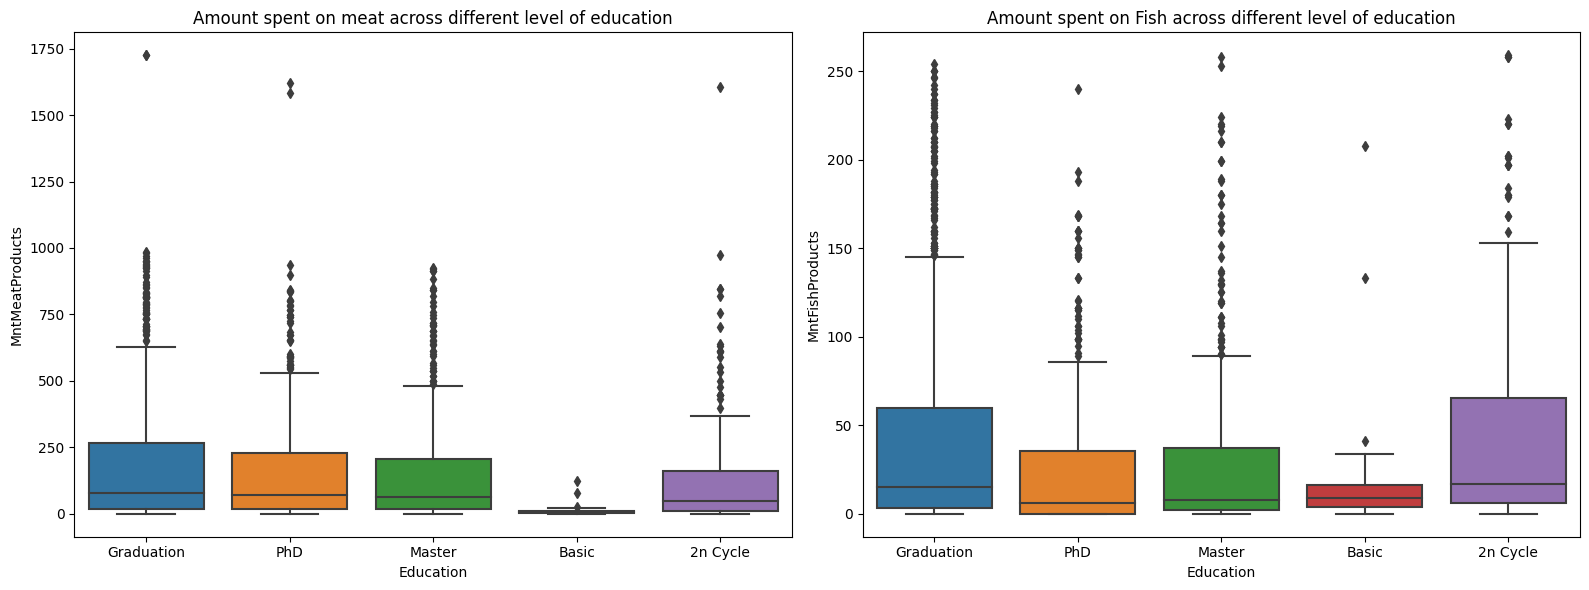

In [15]:
#meat
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(data=marketing_data,x="Education",y="MntMeatProducts")
plt.title("Amount spent on meat across different level of education")

#Fish
plt.subplot(1,2,2)
sns.boxplot(data=marketing_data,x="Education",y="MntFishProducts")
plt.title("Amount spent on Fish across different level of education")
plt.tight_layout()
plt.show()

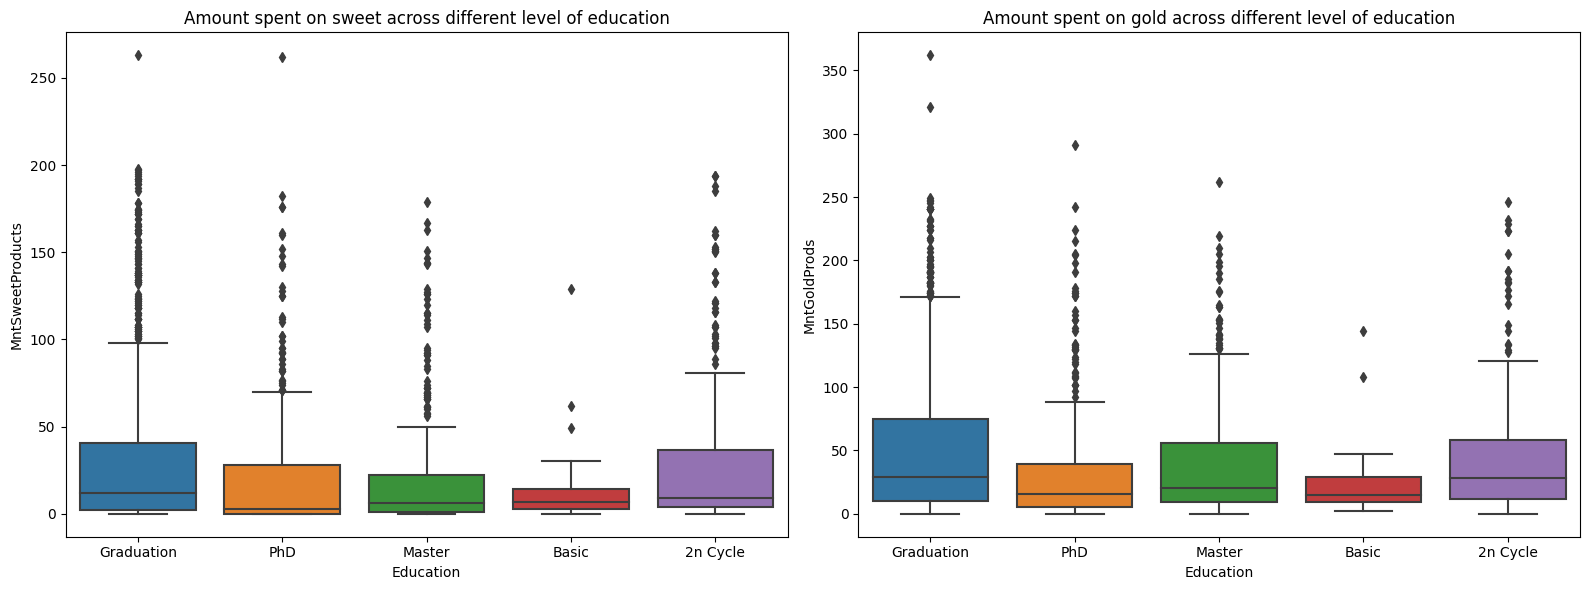

In [16]:
#Sweetroducts
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(data=marketing_data,x="Education",y="MntSweetProducts")
plt.title("Amount spent on sweet across different level of education")

#Gold
plt.subplot(1,2,2)
sns.boxplot(data=marketing_data,x="Education",y="MntGoldProds")
plt.title("Amount spent on gold across different level of education")
plt.tight_layout()
plt.show()

In [17]:
#list of categorical features
category = marketing_data.select_dtypes(include="object").columns
print(category)

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')


# **Purchase from website,catalog,store**

In [18]:
#making new dataframes 
NumDealPurchase = marketing_data.groupby("Education")["NumDealsPurchases"].agg("sum").sort_values(ascending=False).reset_index()
NumWebPurchase = marketing_data.groupby("Education")['NumWebPurchases'].agg("sum").sort_values(ascending=False).reset_index()
NumcatalogPurchase = marketing_data.groupby("Education")["NumCatalogPurchases"].agg("sum").sort_values(ascending=False).reset_index()
NumStorePurchase = marketing_data.groupby("Education")['NumStorePurchases'].agg("sum").sort_values(ascending=False).reset_index()

In [19]:
from IPython.display import display

# Concatenate DataFrames horizontally
df_combined = pd.concat([NumDealPurchase, NumWebPurchase, NumcatalogPurchase, NumStorePurchase], axis=1)

# Display the combined DataFrame
display(df_combined)


,Education,NumDealsPurchases,Education,NumWebPurchases,Education,NumCatalogPurchases,Education,NumStorePurchases
0,Graduation,2603,Graduation,4649,Graduation,3072,Graduation,6570
1,PhD,1154,PhD,2150,PhD,1443,PhD,2946
2,Master,898,Master,1492,Master,951,Master,2182
3,2n Cycle,456,2n Cycle,757,2n Cycle,471,2n Cycle,1118
4,Basic,97,Basic,102,Basic,26,Basic,154


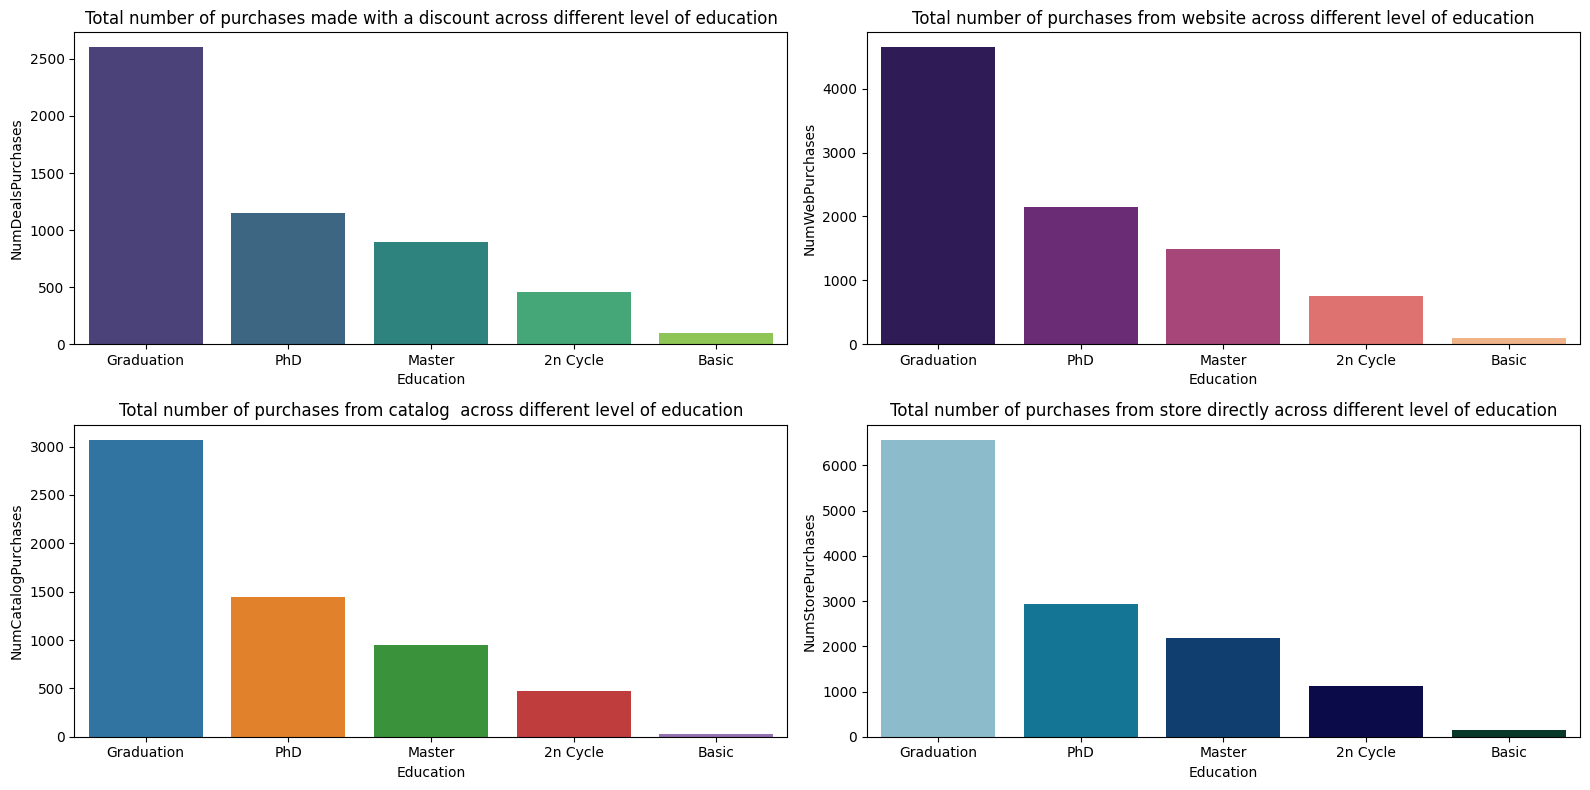

In [20]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.barplot(data = NumDealPurchase,x="Education",y="NumDealsPurchases",palette="viridis")
plt.title("Total number of purchases made with a discount across different level of education")

plt.subplot(2,2,2)
sns.barplot(data = NumWebPurchase,x="Education",y="NumWebPurchases",palette="magma")
plt.title("Total number of purchases from website across different level of education")

plt.subplot(2,2,3)
sns.barplot(data = NumcatalogPurchase,x="Education",y="NumCatalogPurchases")
plt.title("Total number of purchases from catalog  across different level of education")

plt.subplot(2,2,4)
sns.barplot(data = NumStorePurchase,x="Education",y="NumStorePurchases",palette="ocean_r")
plt.title("Total number of purchases from store directly across different level of education")


plt.tight_layout()
plt.show()

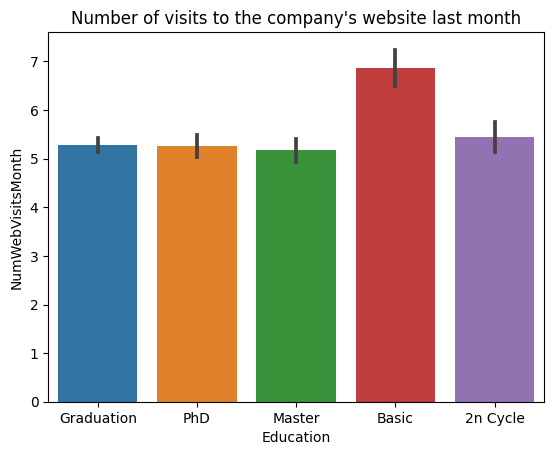

In [21]:
sns.barplot(data=marketing_data,x='Education',y='NumWebVisitsMonth')
plt.title("Number of visits to the company's website last month")
plt.show()

# **Well ! It's shocking but the bar chart say's that consumer's from basic education level visit most of the time than others although in previous cases the response from Basic level consumers were minimal. **

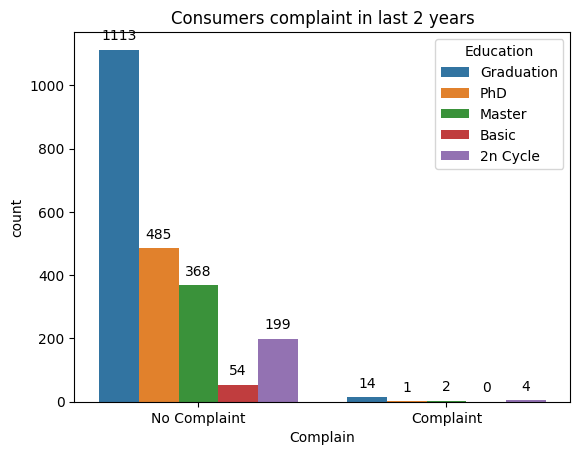

In [22]:
ax = sns.countplot(data=marketing_data,x='Complain',hue="Education")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')
    
ax.set_xticklabels(['No Complaint', 'Complaint'])
plt.title("Consumers complaint in last 2 years")
plt.show()

## **It seems clearly that most of the consumers are satisfied with the products and services. No complain from consumer side. **

# **Correlation**

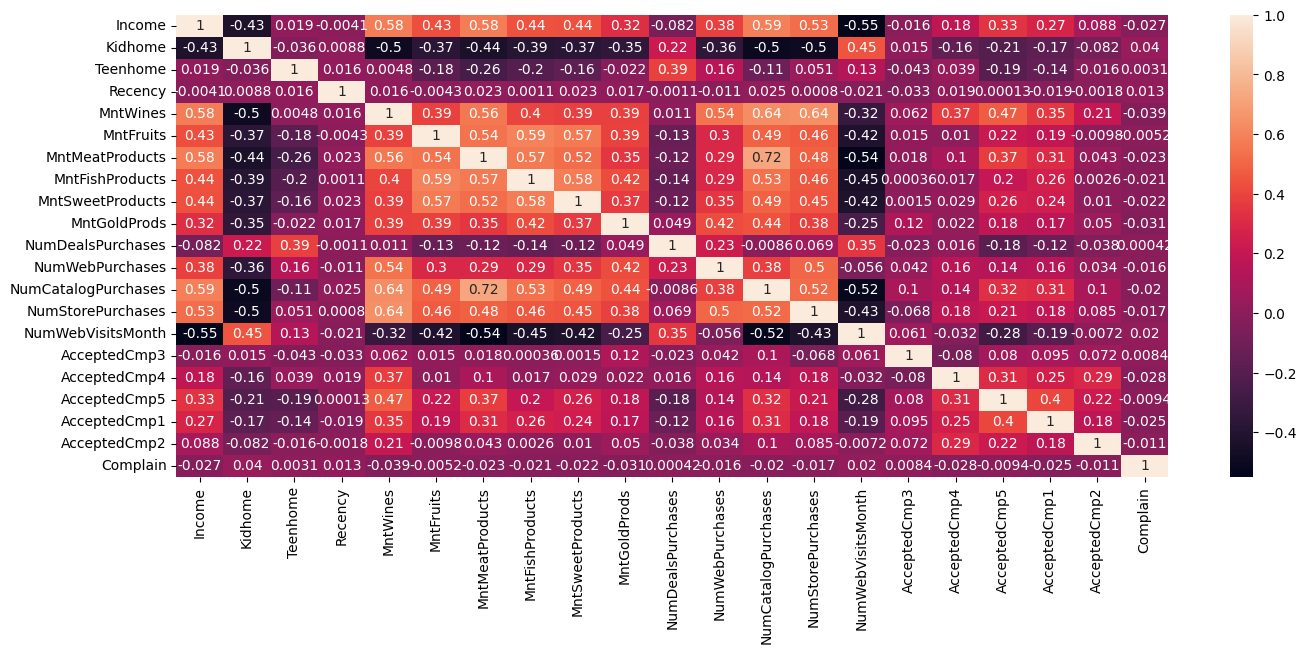

In [23]:
#correlation between the features itselfs which explain the linear relationship between them

df = marketing_data.drop(["ID","Year_Birth","Education","Marital_Status","Dt_Customer","Z_Revenue","Z_CostContact","Response"],axis=1)
plt.figure(figsize=(16,6))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

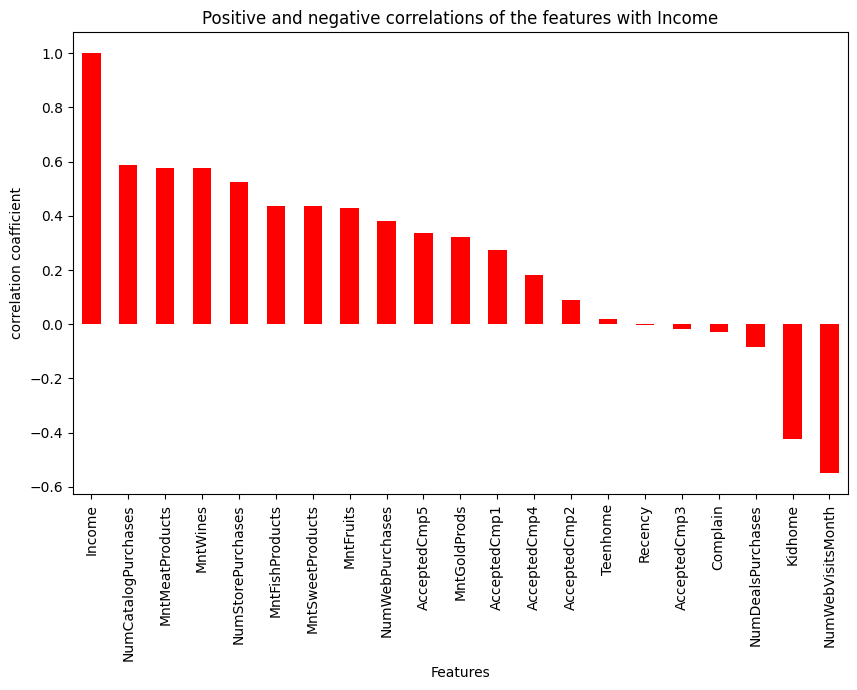

In [24]:
#positive and negative correlations of the Income with other feature

df_corr = df.corr()
plt.figure(figsize = (10,6))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
df_corr['Income'].sort_values(ascending = False).plot(kind = 'bar',color="red")
plt.title("Positive and negative correlations of the features with Income")
plt.xlabel("Features")
plt.ylabel("correlation coafficient")
plt.show()

# **Market compagion offer**

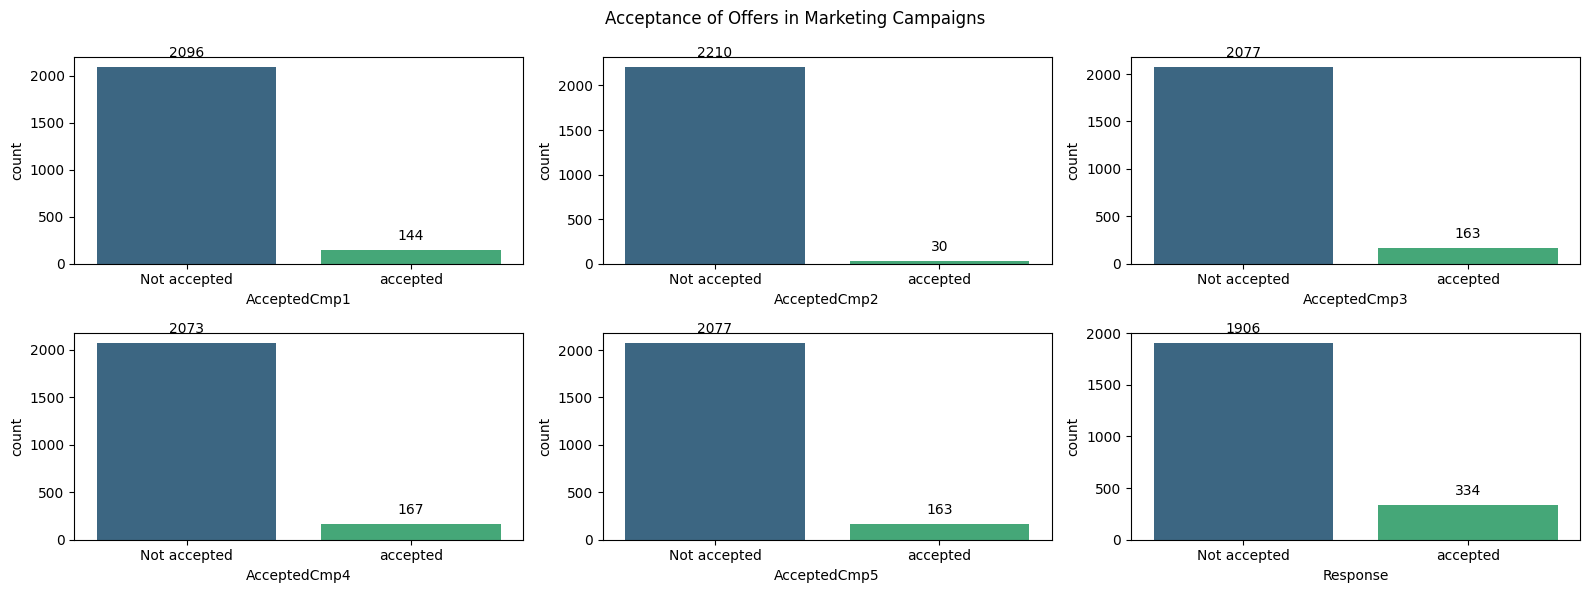

In [25]:
market_compagion = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
plt.figure(figsize=(16, 6))

for i, column in enumerate(market_compagion, 1):
    plt.subplot(2, 3, i)
    ax = sns.countplot(data=marketing_data, x=column,palette="viridis")

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
    ax.set_xticklabels(["Not accepted","accepted"])

plt.suptitle("Acceptance of Offers in Marketing Campaigns")
plt.tight_layout()
plt.show()


### **Most of the consumers rejected the offer.**

# **LabelEncoding**

In [26]:
#convert categorical column into numerical
lbl = LabelEncoder()
std = StandardScaler()
for i in category:
    marketing_data[i] = lbl.fit_transform(marketing_data[i])

In [27]:
#overview
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,80,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,157,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,444,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,199,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,390,94,173,...,5,0,0,0,0,0,0,3,11,0


In [28]:
#split the feature and target

X = marketing_data.drop(['Response','Z_Revenue','Z_CostContact','ID'],axis=1)
y = marketing_data['Response']

#standarization(z-scaling)
std_x = std.fit_transform(X)
X_train, X_test,y_train,y_test = train_test_split(std_x,y,test_size=0.2)

# **SMOTE + RandomForest**

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on the resampled training data
rf_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy:{accuracy*100:.3f} %")

Accuracy:87.500 %


In [30]:
#get the important features

feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

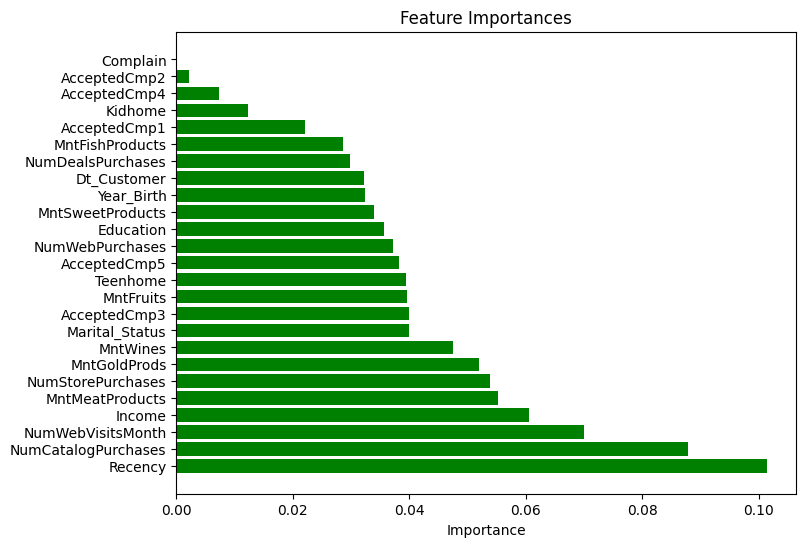

In [31]:
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='green')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

# **PCA+SMOTE+RandomForest**

In [36]:
from sklearn.decomposition import PCA

X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=0.2, random_state=32)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_tr)
X_test_scaled = scaler.transform(X_tst)

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=0.97)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Apply SMOTE to balance the training data
smote = SMOTE()
X_resampled_pca, y_resampled_pca = smote.fit_resample(X_train_pca, y_train)

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the classifier on the resampled training data
rf.fit(X_resampled_pca, y_resampled_pca)

# Make predictions on the test set
y_pred = rf.predict(X_test_pca)

# Calculate the accuracy score
accuracy_pca = accuracy_score(y_test, y_pred)

print(f"Accuracy:{accuracy_pca*100:.4f} %")

Accuracy:80.8036 %


In [40]:
#trying XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_resampled,y_resampled)
print(f"Accuracy: {xgb.score(X_test,y_test)*100:.4f} %")

Accuracy: 86.8304 %
